In [236]:
#NAME: KARL MICHAEL JACINTO
#DATE: 23/07/2021

#THIS CODE ANALYSES CHIP PURCHASING DATA FOR THE QUANTIUM DATA ANALYTICS VIRTUAL INTERNSHIP

In [18]:
#Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#data import
purchase_behaviour = pd.read_csv("QVI_purchase_behaviour.csv")
transaction_data = pd.read_excel("QVI_transaction_data.xlsx")

In [3]:
#purchase behaviour data information
purchase_behaviour.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [4]:
purchase_behaviour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [5]:
transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [6]:
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [7]:
#List of all products
products = np.sort(transaction_data.PROD_NAME.unique())

In [8]:
products

array(['Burger Rings 220g', 'CCs Nacho Cheese    175g',
       'CCs Original 175g', 'CCs Tasty Cheese    175g',
       'Cheetos Chs & Bacon Balls 190g', 'Cheetos Puffs 165g',
       'Cheezels Cheese 330g', 'Cheezels Cheese Box 125g',
       'Cobs Popd Sea Salt  Chips 110g',
       'Cobs Popd Sour Crm  &Chives Chips 110g',
       'Cobs Popd Swt/Chlli &Sr/Cream Chips 110g',
       'Dorito Corn Chp     Supreme 380g',
       'Doritos Cheese      Supreme 330g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Doritos Corn Chips  Cheese Supreme 170g',
       'Doritos Corn Chips  Nacho Cheese 170g',
       'Doritos Corn Chips  Original 170g', 'Doritos Mexicana    170g',
       'Doritos Salsa       Medium 300g', 'Doritos Salsa Mild  300g',
       'French Fries Potato Chips 175g',
       'Grain Waves         Sweet Chilli 210g',
       'Grain Waves Sour    Cream&Chives 210G',
       'GrnWves Plus Btroot & Chilli Jam 180g',
       'Infuzi

In [9]:
#List of all brands
brands = ["Burger Rings", "CCs", "Cheetos", "Cheezels", "Cobs", "Doritos", "French Fries", "Grain Waves", "Infuzions", "Kettle", "Natural Chip Company", "Old El Paso", "Pringles", "Red Rock Deli", "Smiths", "Sunbites", "Thins", "Tostitos", "Twisties", "Tyrrells", "Woolworths"]

In [10]:
brands 

['Burger Rings',
 'CCs',
 'Cheetos',
 'Cheezels',
 'Cobs',
 'Doritos',
 'French Fries',
 'Grain Waves',
 'Infuzions',
 'Kettle',
 'Natural Chip Company',
 'Old El Paso',
 'Pringles',
 'Red Rock Deli',
 'Smiths',
 'Sunbites',
 'Thins',
 'Tostitos',
 'Twisties',
 'Tyrrells',
 'Woolworths']

In [11]:
#Extracts the weights for each product name
weights = []

for product in products:
    weight = [int(s) for s in product if s.isdigit()]
    strings = [str(integer) for integer in weight]
    a_string = "".join(strings)
    an_integer = int(a_string)
    weights.append(an_integer)    

products_weights = dict(zip(list(products), weights))

In [13]:
products_weights

{'Burger Rings 220g': 220,
 'CCs Nacho Cheese    175g': 175,
 'CCs Original 175g': 175,
 'CCs Tasty Cheese    175g': 175,
 'Cheetos Chs & Bacon Balls 190g': 190,
 'Cheetos Puffs 165g': 165,
 'Cheezels Cheese 330g': 330,
 'Cheezels Cheese Box 125g': 125,
 'Cobs Popd Sea Salt  Chips 110g': 110,
 'Cobs Popd Sour Crm  &Chives Chips 110g': 110,
 'Cobs Popd Swt/Chlli &Sr/Cream Chips 110g': 110,
 'Dorito Corn Chp     Supreme 380g': 380,
 'Doritos Cheese      Supreme 330g': 330,
 'Doritos Corn Chip Mexican Jalapeno 150g': 150,
 'Doritos Corn Chip Southern Chicken 150g': 150,
 'Doritos Corn Chips  Cheese Supreme 170g': 170,
 'Doritos Corn Chips  Nacho Cheese 170g': 170,
 'Doritos Corn Chips  Original 170g': 170,
 'Doritos Mexicana    170g': 170,
 'Doritos Salsa       Medium 300g': 300,
 'Doritos Salsa Mild  300g': 300,
 'French Fries Potato Chips 175g': 175,
 'Grain Waves         Sweet Chilli 210g': 210,
 'Grain Waves Sour    Cream&Chives 210G': 210,
 'GrnWves Plus Btroot & Chilli Jam 180g': 18

In [14]:
#Gets the first word for each product to more easily convert the product name to the brand
products_first_word = [product.split()[0] for product in products]

In [15]:
brands_cleaned_list = ["Burger Rings", "CCs", "Cheetos", 
                       "Cheezels", "Cobs", "Doritos", "Doritos", 
                       "French Fries", "Grain Waves", "Grain Waves", 
                       "Infuzions", "Infuzions", "Kettle", "Natural Chip Company", 
                       "Natural Chip Company", "Old El Paso", "Pringles",
                       "Red Rock Deli", "Red Rock Deli", "Smiths",
                       "Smiths", "Sunbites", "Sunbites", "Thins",
                       "Tostitos", "Twisties", "Tyrrells", "Woolworths", 
                       "Woolworths"]

In [16]:
products_first_word = list(dict.fromkeys(products_first_word))

In [17]:
products_brands_dict = dict(zip(products_first_word, brands_cleaned_list))

In [18]:
products_brands_dict

{'Burger': 'Burger Rings',
 'CCs': 'CCs',
 'Cheetos': 'Cheetos',
 'Cheezels': 'Cheezels',
 'Cobs': 'Cobs',
 'Dorito': 'Doritos',
 'Doritos': 'Doritos',
 'French': 'French Fries',
 'Grain': 'Grain Waves',
 'GrnWves': 'Grain Waves',
 'Infuzions': 'Infuzions',
 'Infzns': 'Infuzions',
 'Kettle': 'Kettle',
 'NCC': 'Natural Chip Company',
 'Natural': 'Natural Chip Company',
 'Old': 'Old El Paso',
 'Pringles': 'Pringles',
 'RRD': 'Red Rock Deli',
 'Red': 'Red Rock Deli',
 'Smith': 'Smiths',
 'Smiths': 'Smiths',
 'Snbts': 'Sunbites',
 'Sunbites': 'Sunbites',
 'Thins': 'Thins',
 'Tostitos': 'Tostitos',
 'Twisties': 'Twisties',
 'Tyrrells': 'Tyrrells',
 'WW': 'Woolworths',
 'Woolworths': 'Woolworths'}

In [19]:
#Dictionary that converts the product names to the particular chip varieties
chip_varieties_dict = {
    'Burger Rings 220g': "Burger Rings",
    'CCs Nacho Cheese    175g': "CCs Nacho Cheese",
    'CCs Original 175g': "CCs Original",
    'CCs Tasty Cheese    175g': "CCs Tasty Cheese",
    'Cheetos Chs & Bacon Balls 190g': "Cheetos Cheese & Bacon Balls",
    'Cheetos Puffs 165g': "Cheetos Puffs",
    'Cheezels Cheese 330g': "Cheezels Cheese",
    'Cheezels Cheese Box 125g': "Cheezels Cheese",
    'Cobs Popd Sea Salt  Chips 110g': "Cobs Pop'd Sea Salt",
    'Cobs Popd Sour Crm  &Chives Chips 110g': "Cobs Pop'd Sour Cream & Chives",
    'Cobs Popd Swt/Chlli &Sr/Cream Chips 110g': "Cobs Pop'd Sweet Chilli & Sour Cream",
    'Dorito Corn Chp     Supreme 380g': "Doritos Supreme",
    'Doritos Cheese      Supreme 330g': "Doritos Supreme",
    'Doritos Corn Chip Mexican Jalapeno 150g': "Doritos Mexican Jalapeno",
    'Doritos Corn Chip Southern Chicken 150g': "Doritos Southern Chicken",
    'Doritos Corn Chips  Cheese Supreme 170g': "Doritos Cheese Supreme",
    'Doritos Corn Chips  Nacho Cheese 170g': "Doritos Nacho Cheese",
    'Doritos Corn Chips  Original 170g': "Doritos Original",
    'Doritos Mexicana    170g': "Doritos Mexicana",
    'Doritos Salsa       Medium 300g': "Doritos Salsa Medium",
    'Doritos Salsa Mild  300g': "Doritos Salsa Mild",
    'French Fries Potato Chips 175g': "French Fries",
    'Grain Waves         Sweet Chilli 210g': "Grain Waves Sweet Chilli",
    'Grain Waves Sour    Cream&Chives 210G': "Grain Waves Sour Cream & Chives",
    'GrnWves Plus Btroot & Chilli Jam 180g': "Grain Waves Plus Beetroot Sweet Chilli Jam",
    'Infuzions BBQ Rib   Prawn Crackers 110g': "Infuzions BBQ Rib Prawn Crackers",
    'Infuzions Mango     Chutny Papadums 70g': "Infuzions Mango Chutney Papadums",
    'Infuzions SourCream&Herbs Veg Strws 110g': "Infuzions Sour Cream & Herb Veggie Straws",
    'Infuzions Thai SweetChili PotatoMix 110g': "Infuzions Thai Sweet Chilli Potato Mix",
    'Infzns Crn Crnchers Tangy Gcamole 110g': "Infuzions Corn Crunchers Guacamole",
    'Kettle 135g Swt Pot Sea Salt': "Kettle Sweet Potato Sea Salt",
    'Kettle Chilli 175g': "Kettle Chilli",
    'Kettle Honey Soy    Chicken 175g': "Kettle Honey Soy Chicken",
    'Kettle Mozzarella   Basil & Pesto 175g': "Kettle Mozzarella Basil & Pesto",
    'Kettle Original 175g': "Kettle Original",
    'Kettle Sea Salt     And Vinegar 175g': "Kettle Sea Salt & Vinegar",
    'Kettle Sensations   BBQ&Maple 150g': "Kettle Sensations BBQ & Maple",
    'Kettle Sensations   Camembert & Fig 150g': "Kettle Sensations Camembert & Fig",
    'Kettle Sensations   Siracha Lime 150g': "Kettle Sensations Sriracha Lime",
    'Kettle Sweet Chilli And Sour Cream 175g': "Kettle Sweet Chilli And Sour Cream",
    'Kettle Tortilla ChpsBtroot&Ricotta 150g': "Kettle Tortilla Chips Beetroot & Ricotta",
    'Kettle Tortilla ChpsFeta&Garlic 150g': "Kettle Tortilla Chips Feta & Garlic",
    'Kettle Tortilla ChpsHny&Jlpno Chili 150g': "Kettle Tortilla Chips Hony & Jalapeno Chilli",
    'NCC Sour Cream &    Garden Chives 175g': "Natural Chip Company Sour Cream & Garden Chives",
    'Natural Chip        Compny SeaSalt175g': "Natural Chip Company Sea Salt",
    'Natural Chip Co     Tmato Hrb&Spce 175g': "Natural Chip Company Tomato Herb & Spice",
    'Natural ChipCo      Hony Soy Chckn175g': "Natural Chip Company Honey Soy Chicken",
    'Natural ChipCo Sea  Salt & Vinegr 175g': "Natural Chip Company Sea Sale & Vinegar",
    'Old El Paso Salsa   Dip Chnky Tom Ht300g': "Old El Paso Salsa Dip Chunky Tomato",
    'Old El Paso Salsa   Dip Tomato Med 300g': "Old El Paso Salsa Dip Tomato Medium",
    'Old El Paso Salsa   Dip Tomato Mild 300g': "Old El Paso Salsa Dip Tomato Mild",
    'Pringles Barbeque   134g': "Pringles BBQ",
    'Pringles Chicken    Salt Crips 134g': "Pringles Chicken",
    'Pringles Mystery    Flavour 134g': "Pringles Mystery Flavour",
    'Pringles Original   Crisps 134g': "Pringles Original",
    'Pringles Slt Vingar 134g': "Pringles Salt & Vinegar",
    'Pringles SourCream  Onion 134g': "Pringles Sour Cream & Onion",
    'Pringles Sthrn FriedChicken 134g': "Pringles Southern Fried Chicken",
    'Pringles Sweet&Spcy BBQ 134g': "Pringles Sweet & Spicy BBQ",
    'RRD Chilli&         Coconut 150g': "Red Rock Deli Chilli & Coconut",
    'RRD Honey Soy       Chicken 165g': "Red Rock Deli Honey Soy Chicken",
    'RRD Lime & Pepper   165g': "Red Rock Deli Lime & Pepper",
    'RRD Pc Sea Salt     165g': "Red Rock Deli Sea Salt",
    'RRD SR Slow Rst     Pork Belly 150g': "Red Rock Deli Slow Roasted Pork Belly",
    'RRD Salt & Vinegar  165g': "Red Rock Deli Salt & Vinegar",
    'RRD Steak &         Chimuchurri 150g': "Red Rock Deli Steak & Chimichurri",
    'RRD Sweet Chilli &  Sour Cream 165g': "Red Rock Deli Sweet Chilli & Sour Cream",
    'Red Rock Deli Chikn&Garlic Aioli 150g': "Red Rock Deli Chicken & Garlic Aioli",
    'Red Rock Deli SR    Salsa & Mzzrlla 150g': "Red Rock Deli Salsa & Mozzarella",
    'Red Rock Deli Sp    Salt & Truffle 150G': "Red Rock Deli Salt & Truffle",
    'Red Rock Deli Thai  Chilli&Lime 150g': "Red Rock Deli Thai Chilli & Lime",
    'Smith Crinkle Cut   Bolognese 150g': "Smiths Crinkle Cut Bolognese",
    'Smith Crinkle Cut   Mac N Cheese 150g': "Smiths Crinkle Cut Mac 'n' Cheese",
    'Smiths Chip Thinly  Cut Original 175g': "Smiths Thinly Cut Original",
    'Smiths Chip Thinly  CutSalt/Vinegr175g': "Smiths Thinly Cut Salt & Vinegar",
    'Smiths Chip Thinly  S/Cream&Onion 175g': "Smiths Thinly Cut Sour Cream & Onion",
    'Smiths Crinkle      Original 330g': "Smiths Crinkle Cut Original",
    'Smiths Crinkle Chips Salt & Vinegar 330g': "Smiths Crinkle Cut Salt & Vinegar",
    'Smiths Crinkle Cut  Chips Barbecue 170g': "Smiths Crinkle Cut BBQ",
    'Smiths Crinkle Cut  Chips Chicken 170g': "Smiths Crinkle Cut Chicken",
    'Smiths Crinkle Cut  Chips Chs&Onion170g': "Smiths Crinkle Cut Cheese & Onion",
    'Smiths Crinkle Cut  Chips Original 170g': "Smiths Crinkle Cut Original",
    'Smiths Crinkle Cut  French OnionDip 150g': "Smiths Crinkle Cut French Onion",
    'Smiths Crinkle Cut  Salt & Vinegar 170g': "Smiths Crinkle Cut Salt & Vinegar",
    'Smiths Crinkle Cut  Snag&Sauce 150g': "Smiths Crinkle Cut Snag & Sauce",
    'Smiths Crinkle Cut  Tomato Salsa 150g': "Smiths Crinkle Cut Tomato Salsa",
    'Smiths Crnkle Chip  Orgnl Big Bag 380g': "Smiths Crinkle Cut Original",
    'Smiths Thinly       Swt Chli&S/Cream175G': "Smiths Thinly Cut Sweet Chilli & Sour Cream",
    'Smiths Thinly Cut   Roast Chicken 175g': "Smiths Thinly Cut Roast Chicken",
    'Snbts Whlgrn Crisps Cheddr&Mstrd 90g': "Sunbites Wholegrain Cheddar & Mustard",
    'Sunbites Whlegrn    Crisps Frch/Onin 90g': "Sunbites Wholegrain French Onion",
    'Thins Chips         Originl saltd 175g': "Thins Original",
    'Thins Chips Light&  Tangy 175g': "Thins Light & Tangy",
    'Thins Chips Salt &  Vinegar 175g': "Thins Salt & Vinegar",
    'Thins Chips Seasonedchicken 175g': "Thins Seasoned Chicken",
    'Thins Potato Chips  Hot & Spicy 175g': "Thins Hot & Spicy",
    'Tostitos Lightly    Salted 175g': "Tostitos Lightly Salted",
    'Tostitos Smoked     Chipotle 175g': "Tostitos Smoked Chipotle",
    'Tostitos Splash Of  Lime 175g': "Tostitos Splash of Lime",
    'Twisties Cheese     270g': "Twisties Cheese",
    'Twisties Cheese     Burger 250g': "Twisties Cheeseburger",
    'Twisties Chicken270g': "Twisties Chicken",
    'Tyrrells Crisps     Ched & Chives 165g': "Tyrrells Cheddar & Chives",
    'Tyrrells Crisps     Lightly Salted 165g': "Tyrrells Lightly Salted",
    'WW Crinkle Cut      Chicken 175g': "Woolworths Crinkle Cut Chicken",
    'WW Crinkle Cut      Original 175g': "Woolworths Crinkle Cut Original",
    'WW D/Style Chip     Sea Salt 200g': "Woolworths Deli Style Sea Salt",
    'WW Original Corn    Chips 200g': "Woolworths Corn Chips Original",
    'WW Original Stacked Chips 160g': "Woolworths Stacked Chips Original",
    'WW Sour Cream &OnionStacked Chips 160g': "Woolworths Stacked Chips Sour Cream and Onion",
    'WW Supreme Cheese   Corn Chips 200g': "Woolworths Corn Chips Supreme Cheese",
    'Woolworths Cheese   Rings 190g': "Woolworths Cheese Rings",
    'Woolworths Medium   Salsa 300g': "Woolworths Medium Salsa",
    'Woolworths Mild     Salsa 300g': "Woolworths Mild Salsa"
}

In [20]:
transaction_data["Weight"] = transaction_data["PROD_NAME"].replace(products_weights)

In [21]:
transaction_data["Chip Variety"] = transaction_data["PROD_NAME"].replace(chip_varieties_dict)

In [22]:
def get_first_word(s):
    return s.split()[0]

In [23]:
transaction_data["Prod first word"] = transaction_data["PROD_NAME"].apply(get_first_word)

In [24]:
transaction_data["Brand"] = transaction_data["Prod first word"].replace(products_brands_dict)

In [25]:
transaction_data = transaction_data.drop(["PROD_NAME", "Prod first word"], axis = 1)

In [27]:
transaction_data

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,Weight,Chip Variety,Brand
0,43390,1,1000,1,5,2,6.0,175,Natural Chip Company Sea Salt,Natural Chip Company
1,43599,1,1307,348,66,3,6.3,175,CCs Nacho Cheese,CCs
2,43605,1,1343,383,61,2,2.9,170,Smiths Crinkle Cut Chicken,Smiths
3,43329,2,2373,974,69,5,15.0,175,Smiths Thinly Cut Sour Cream & Onion,Smiths
4,43330,2,2426,1038,108,3,13.8,150,Kettle Tortilla Chips Hony & Jalapeno Chilli,Kettle
...,...,...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,2,10.8,175,Kettle Sweet Chilli And Sour Cream,Kettle
264832,43325,272,272358,270154,74,1,4.4,175,Tostitos Splash of Lime,Tostitos
264833,43410,272,272379,270187,51,2,8.8,170,Doritos Mexicana,Doritos
264834,43461,272,272379,270188,42,2,7.8,150,Doritos Mexican Jalapeno,Doritos


In [28]:
purchase_behaviour

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


In [29]:
#Merges the two datasets together
transactions_customers = transaction_data.merge(purchase_behaviour, on = "LYLTY_CARD_NBR")

In [32]:
#Calculate price
transactions_customers["Price"] = transactions_customers["TOT_SALES"] / transactions_customers["PROD_QTY"]

In [37]:
#Summarises the brands
brands_sum = transactions_customers.groupby("Brand").sum()

<BarContainer object of 21 artists>

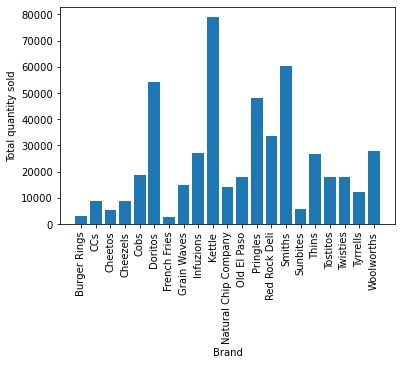

In [238]:
#Graphs total quantity sold by brand
plt.xlabel("Brand")
plt.ylabel("Total quantity sold")
plt.xticks(rotation = 90)
plt.bar(brands_sum.index, brands_sum["PROD_QTY"])

In [239]:
#Calculates sum of quantity sold by brand and customer segment
brands_profile_sum = transactions_customers.groupby(["Brand", "PREMIUM_CUSTOMER"]).sum()["PROD_QTY"]

brands_profile_sum_100 = brands_profile_sum.unstack()

brands_profile_sum_100["Total"] = brands_profile_sum_100.sum(axis = 1)

for column in brands_profile_sum_100.columns:
    brands_profile_sum_100[column] = brands_profile_sum_100[column] / brands_profile_sum_100["Total"]

brands_profile_sum_100 = brands_profile_sum_100.drop("Total", axis = 1)

#Results in a sum of 100

<AxesSubplot:xlabel='Brand'>

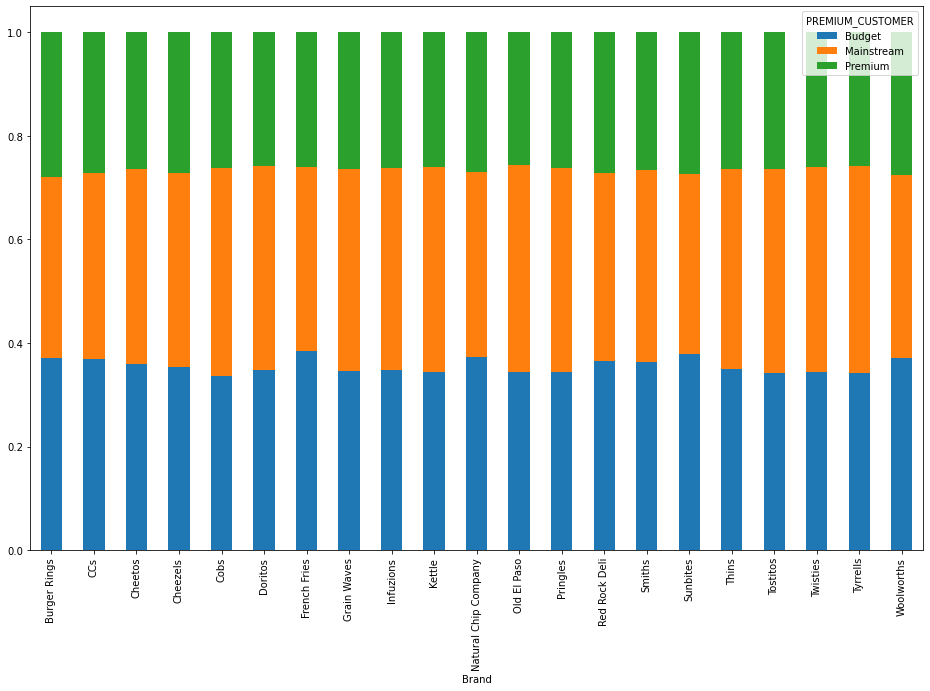

In [68]:
#Proportion of customers in each customer segment by brand
fig, ax = plt.subplots(figsize = (16,10)) #sets size of chart
brands_profile_sum_100.plot(kind="bar", stacked = True, ax = ax)

<AxesSubplot:xlabel='Brand'>

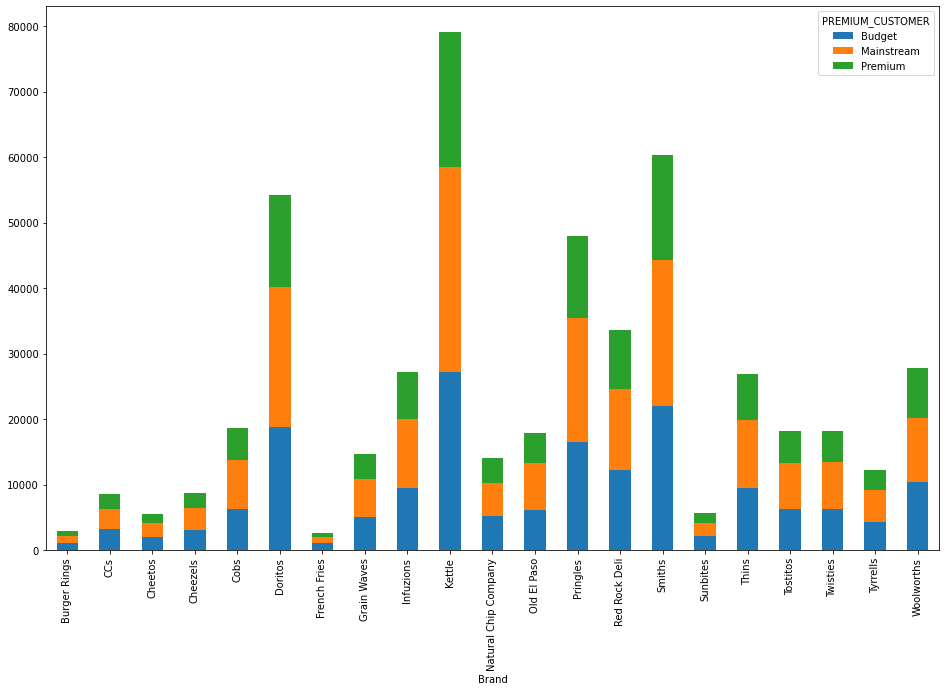

In [49]:
fig, ax = plt.subplots(figsize = (16,10))
brands_profile_sum.unstack().plot(kind='bar', stacked=True, ax = ax)

<AxesSubplot:xlabel='Brand'>

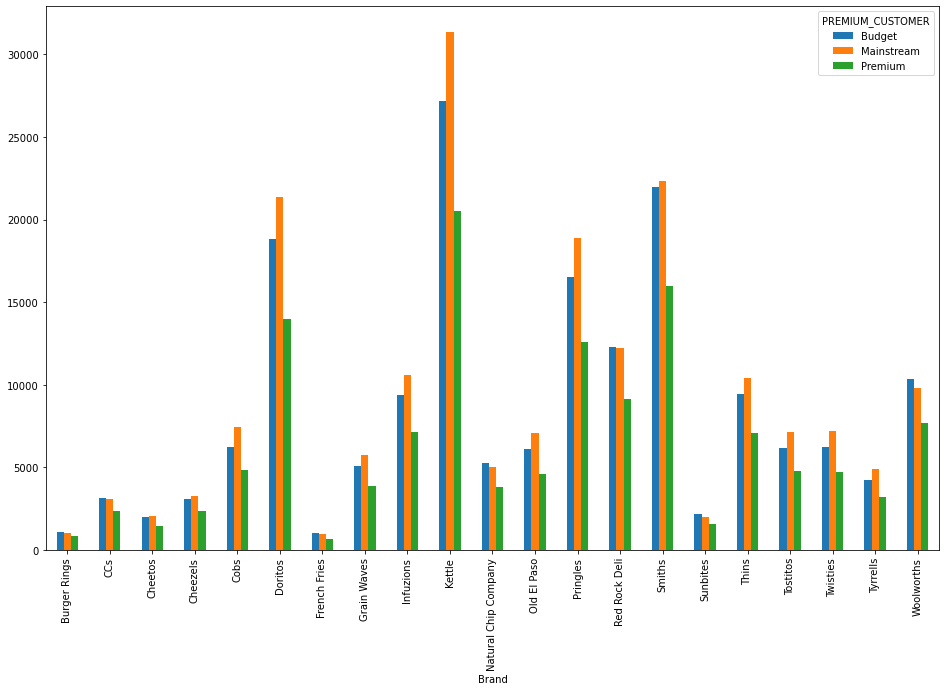

In [47]:
fig, ax = plt.subplots(figsize = (16,10))
brands_profile_sum.unstack().plot(kind='bar', stacked=False, ax = ax)

In [72]:
brands_lifestage_sum_100.columns

Index(['MIDAGE SINGLES/COUPLES', 'NEW FAMILIES', 'OLDER FAMILIES',
       'OLDER SINGLES/COUPLES', 'RETIREES', 'YOUNG FAMILIES',
       'YOUNG SINGLES/COUPLES', 'Total'],
      dtype='object', name='LIFESTAGE')

In [73]:
#Same as before, but lifestage instead of customer profile
brands_lifestage_sum = transactions_customers.groupby(["Brand", "LIFESTAGE"]).sum()["PROD_QTY"]

brands_lifestage_sum_100 = brands_lifestage_sum.unstack()

brands_lifestage_sum_100["Total"] = brands_lifestage_sum_100.sum(axis = 1)

for column in brands_lifestage_sum_100.columns:
    brands_lifestage_sum_100[column] = brands_lifestage_sum_100[column] / brands_lifestage_sum_100["Total"]

brands_lifestage_sum_100 = brands_lifestage_sum_100.drop("Total", axis = 1)

<AxesSubplot:xlabel='Brand'>

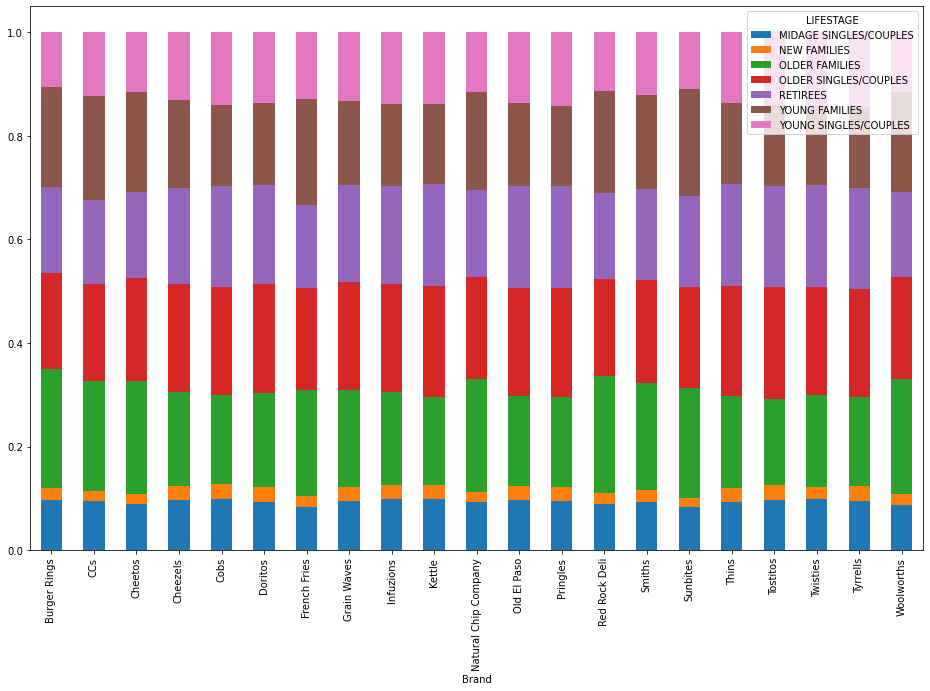

In [75]:
fig, ax = plt.subplots(figsize = (16,10))
brands_lifestage_sum_100.plot(kind="bar", stacked = True, ax = ax)

<AxesSubplot:xlabel='Brand'>

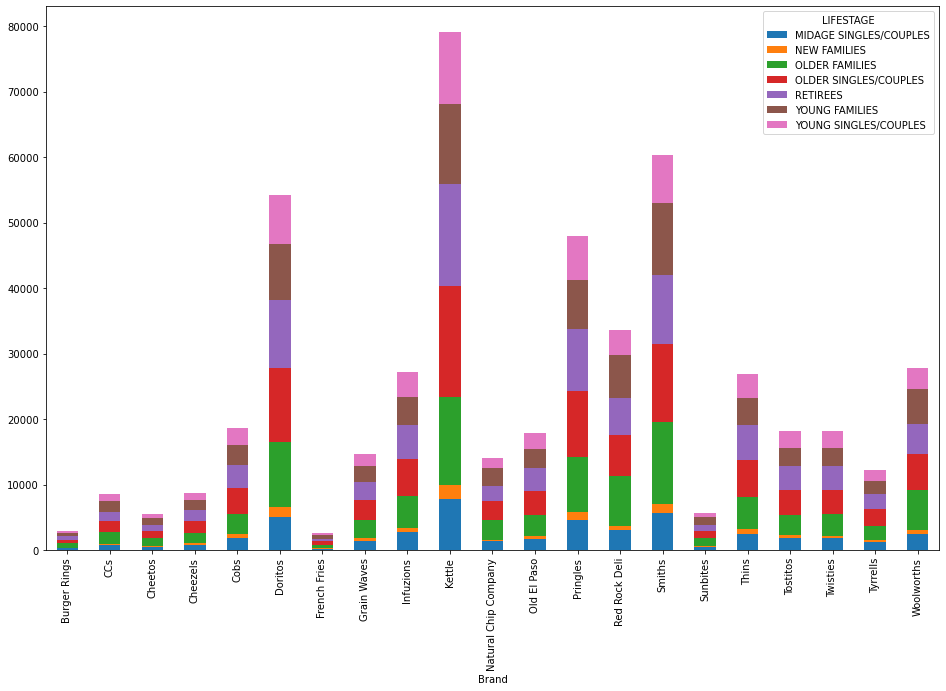

In [76]:
fig, ax = plt.subplots(figsize = (16,10))
brands_lifestage_sum.unstack().plot(kind='bar', stacked=True, ax = ax)

<AxesSubplot:xlabel='Brand'>

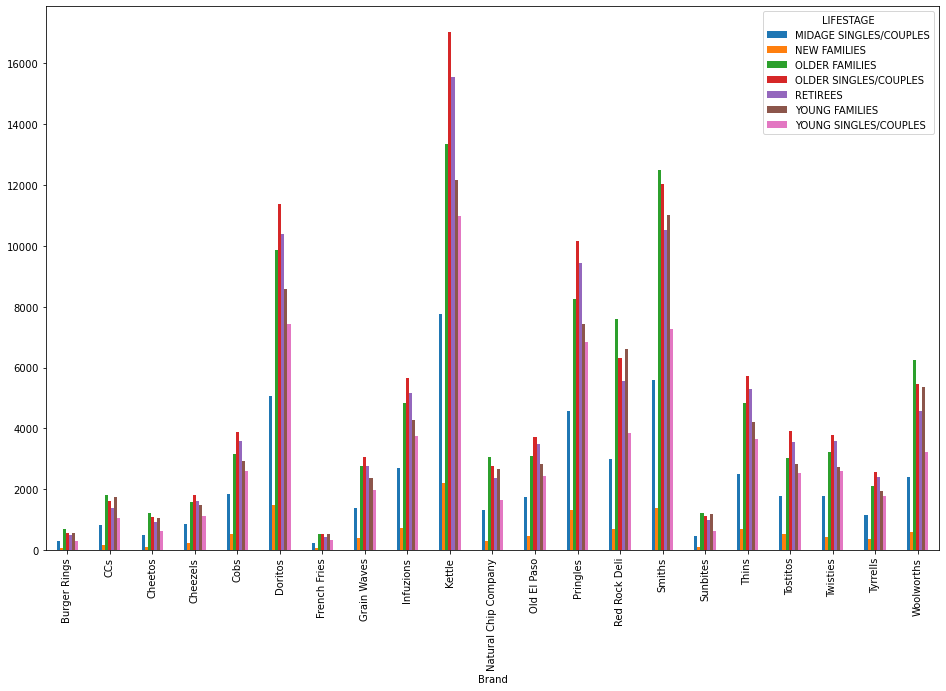

In [78]:
fig, ax = plt.subplots(figsize = (16,10))
brands_lifestage_sum.unstack().plot(kind='bar', stacked=False, ax = ax)

In [81]:
chips_sum = transactions_customers.groupby("Chip Variety").sum()["PROD_QTY"]

In [83]:
chips_sum.sort_values()

Chip Variety
French Fries                                        2643
Woolworths Crinkle Cut Original                     2666
Natural Chip Company Sour Cream & Garden Chives     2682
Woolworths Medium Salsa                             2700
Red Rock Deli Sea Salt                              2702
                                                   ...  
Kettle Mozzarella Basil & Pesto                     6381
Cheezels Cheese                                     8747
Smiths Crinkle Cut Salt & Vinegar                   8860
Doritos Supreme                                    12367
Smiths Crinkle Cut Original                        14941
Name: PROD_QTY, Length: 109, dtype: int64

In [107]:
#Finds the best and worst selling chips
worst_selling_chips = chips_sum.sort_values().head(20)

best_selling_chips = chips_sum.sort_values().tail(20)

worst_chips_lifestage_sum = transactions_customers[transactions_customers["Chip Variety"].isin(worst_selling_chips.index)].groupby(["Chip Variety", "LIFESTAGE"]).sum()["PROD_QTY"]

best_chips_lifestage_sum = transactions_customers[transactions_customers["Chip Variety"].isin(best_selling_chips.index)].groupby(["Chip Variety", "LIFESTAGE"]).sum()["PROD_QTY"]

In [111]:
worst_chips_lifestage_sum

Chip Variety             LIFESTAGE             
Cheetos Puffs            MIDAGE SINGLES/COUPLES    228
                         NEW FAMILIES               49
                         OLDER FAMILIES            607
                         OLDER SINGLES/COUPLES     492
                         RETIREES                  501
                                                  ... 
Woolworths Medium Salsa  OLDER FAMILIES            577
                         OLDER SINGLES/COUPLES     522
                         RETIREES                  499
                         YOUNG FAMILIES            523
                         YOUNG SINGLES/COUPLES     290
Name: PROD_QTY, Length: 140, dtype: int64

In [112]:
worst_chips_lifestage_sum_100 = worst_chips_lifestage_sum.unstack()

worst_chips_lifestage_sum_100["Total"] = worst_chips_lifestage_sum_100.sum(axis = 1)

for column in worst_chips_lifestage_sum_100.columns:
    worst_chips_lifestage_sum_100[column] = worst_chips_lifestage_sum_100[column] / worst_chips_lifestage_sum_100["Total"]

worst_chips_lifestage_sum_100 = worst_chips_lifestage_sum_100.drop("Total", axis = 1)

<AxesSubplot:xlabel='Chip Variety'>

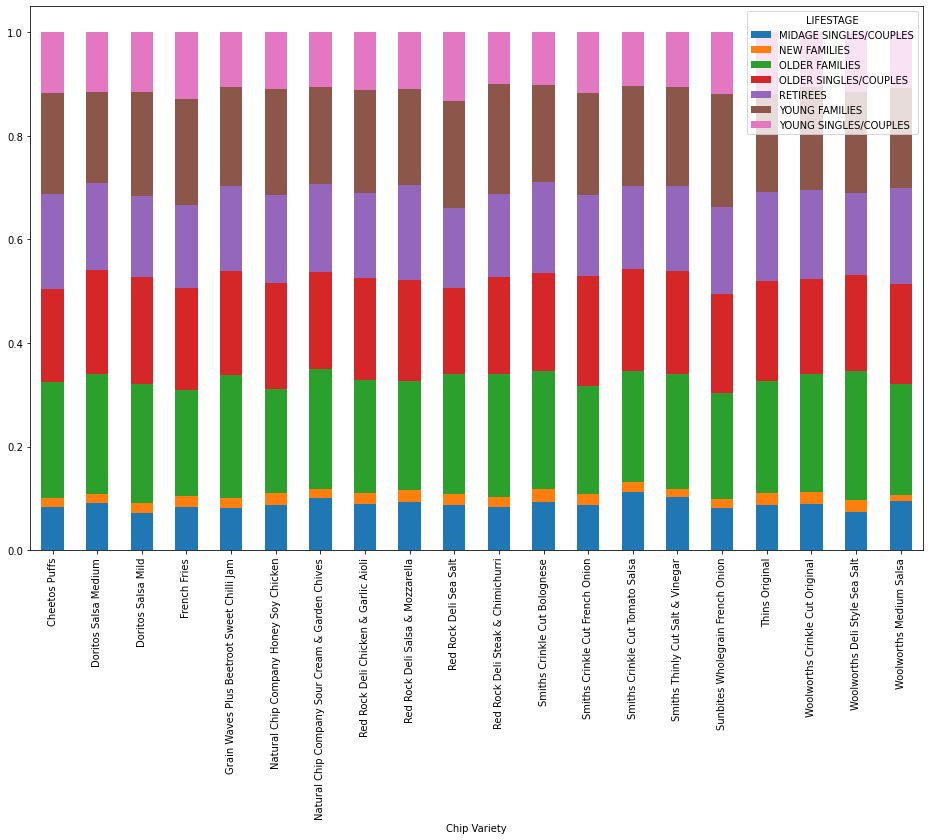

In [113]:
#For the worst selling chips, what percentage of sales belongs to each lifestage?
fig, ax = plt.subplots(figsize = (16,10))
worst_chips_lifestage_sum_100.plot(kind="bar", stacked = True, ax = ax)

In [114]:
best_chips_lifestage_sum_100 = best_chips_lifestage_sum.unstack()

best_chips_lifestage_sum_100["Total"] = best_chips_lifestage_sum_100.sum(axis = 1)

for column in best_chips_lifestage_sum_100.columns:
    best_chips_lifestage_sum_100[column] = best_chips_lifestage_sum_100[column] / best_chips_lifestage_sum_100["Total"]

best_chips_lifestage_sum_100 = best_chips_lifestage_sum_100.drop("Total", axis = 1)

<AxesSubplot:xlabel='Chip Variety'>

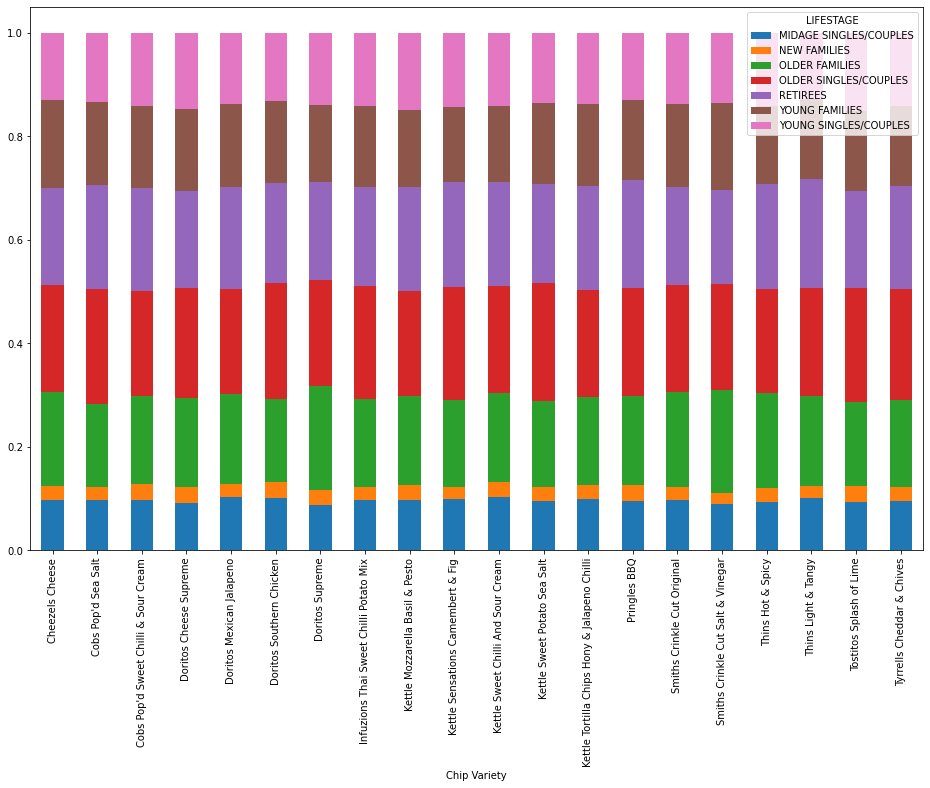

In [115]:
fig, ax = plt.subplots(figsize = (16,10))
best_chips_lifestage_sum_100.plot(kind="bar", stacked = True, ax = ax)

In [116]:
worst_chips_profile_sum = transactions_customers[transactions_customers["Chip Variety"].isin(worst_selling_chips.index)].groupby(["Chip Variety", "PREMIUM_CUSTOMER"]).sum()["PROD_QTY"]

In [117]:
best_chips_profile_sum = transactions_customers[transactions_customers["Chip Variety"].isin(best_selling_chips.index)].groupby(["Chip Variety", "PREMIUM_CUSTOMER"]).sum()["PROD_QTY"]

In [118]:
worst_chips_profile_sum_100 = worst_chips_profile_sum.unstack()

worst_chips_profile_sum_100["Total"] = worst_chips_profile_sum_100.sum(axis = 1)

for column in worst_chips_profile_sum_100.columns:
    worst_chips_profile_sum_100[column] = worst_chips_profile_sum_100[column] / worst_chips_profile_sum_100["Total"]

worst_chips_profile_sum_100 = worst_chips_profile_sum_100.drop("Total", axis = 1)

<AxesSubplot:xlabel='Chip Variety'>

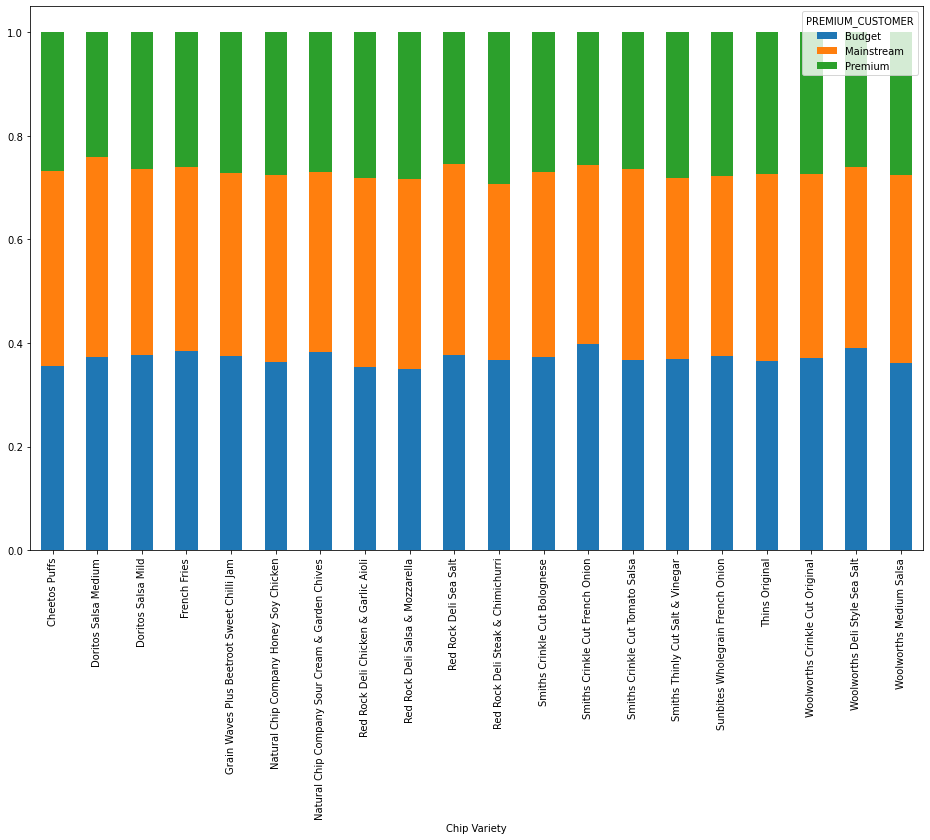

In [119]:
fig, ax = plt.subplots(figsize = (16,10))
worst_chips_profile_sum_100.plot(kind="bar", stacked = True, ax = ax)

In [120]:
best_chips_profile_sum_100 = best_chips_profile_sum.unstack()

best_chips_profile_sum_100["Total"] = best_chips_profile_sum_100.sum(axis = 1)

for column in best_chips_profile_sum_100.columns:
    best_chips_profile_sum_100[column] = best_chips_profile_sum_100[column] / best_chips_profile_sum_100["Total"]

best_chips_profile_sum_100 = best_chips_profile_sum_100.drop("Total", axis = 1)

<AxesSubplot:xlabel='Chip Variety'>

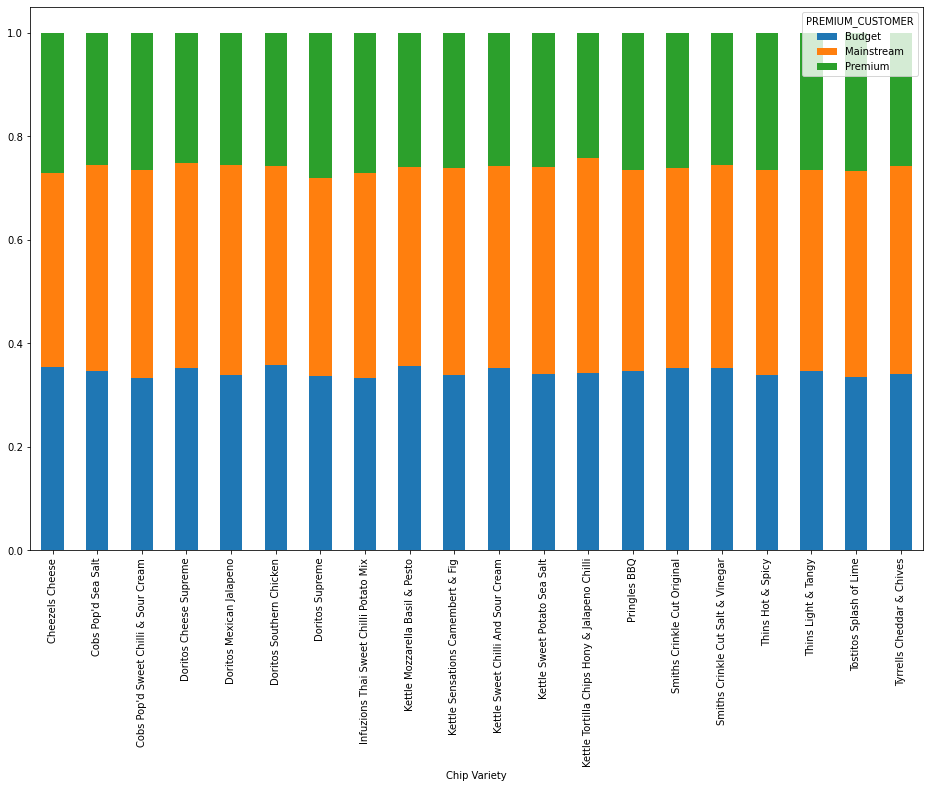

In [121]:
fig, ax = plt.subplots(figsize = (16,10))
best_chips_profile_sum_100.plot(kind="bar", stacked = True, ax = ax)

In [137]:
import datetime

In [138]:
#Converts Excel serial number to date
def serial_to_date(date):
    start = datetime.datetime(1899, 12, 30) #Note 30th instead of 31st
    delta = datetime.timedelta(days = date)
    return start + delta

In [141]:
transactions_customers["DATE"] = transactions_customers["DATE"].apply(serial_to_date)

In [151]:
def get_month(date):
    return date.month

In [152]:
transactions_customers["Month"] = transactions_customers["DATE"].apply(get_month)

In [154]:
transactions_customers

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,Weight,Chip Variety,Brand,LIFESTAGE,PREMIUM_CUSTOMER,Price,Month
0,2018-10-17,1,1000,1,5,2,6.0,175,Natural Chip Company Sea Salt,Natural Chip Company,YOUNG SINGLES/COUPLES,Premium,3.00,10
1,2019-05-14,1,1307,348,66,3,6.3,175,CCs Nacho Cheese,CCs,MIDAGE SINGLES/COUPLES,Budget,2.10,5
2,2018-11-10,1,1307,346,96,2,3.8,160,Woolworths Stacked Chips Original,Woolworths,MIDAGE SINGLES/COUPLES,Budget,1.90,11
3,2019-03-09,1,1307,347,54,1,2.1,175,CCs Original,CCs,MIDAGE SINGLES/COUPLES,Budget,2.10,3
4,2019-05-20,1,1343,383,61,2,2.9,170,Smiths Crinkle Cut Chicken,Smiths,MIDAGE SINGLES/COUPLES,Budget,1.45,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,2,10.8,175,Kettle Sweet Chilli And Sour Cream,Kettle,YOUNG SINGLES/COUPLES,Premium,5.40,3
264832,2018-08-13,272,272358,270154,74,1,4.4,175,Tostitos Splash of Lime,Tostitos,YOUNG SINGLES/COUPLES,Premium,4.40,8
264833,2018-11-06,272,272379,270187,51,2,8.8,170,Doritos Mexicana,Doritos,YOUNG SINGLES/COUPLES,Premium,4.40,11
264834,2018-12-27,272,272379,270188,42,2,7.8,150,Doritos Mexican Jalapeno,Doritos,YOUNG SINGLES/COUPLES,Premium,3.90,12


<AxesSubplot:xlabel='DATE'>

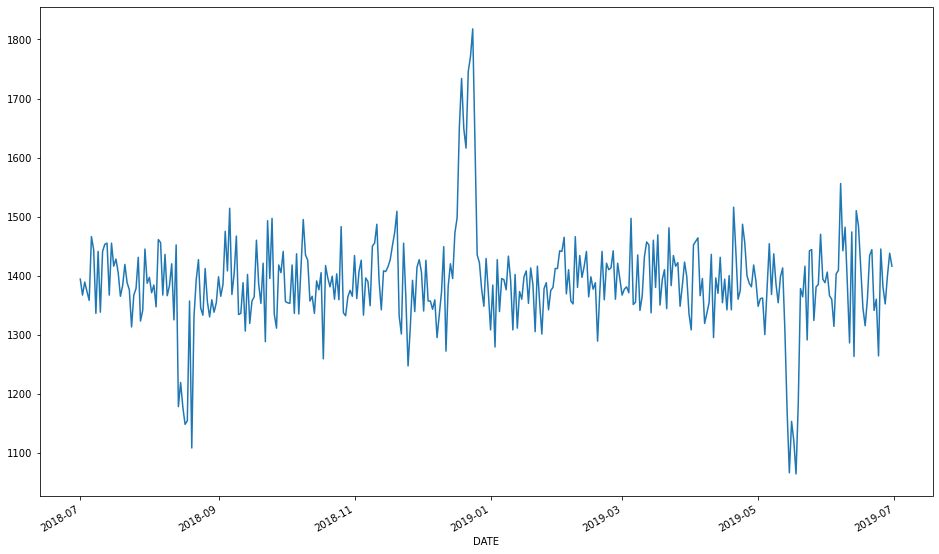

In [208]:
#Product quantity sold by day
date_sum = transactions_customers.groupby(["DATE"]).sum()["PROD_QTY"]

fig, ax = plt.subplots(figsize = (16,10))
date_sum.plot()

<AxesSubplot:xlabel='DATE'>

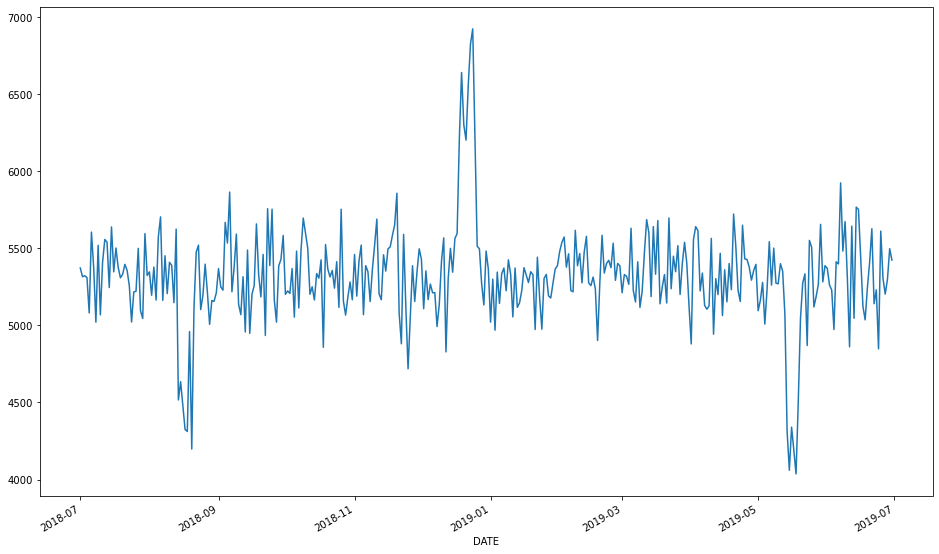

In [242]:
#Total sales by day
date_sum = transactions_customers.groupby(["DATE"]).sum()["TOT_SALES"]

fig, ax = plt.subplots(figsize = (16,10))
date_sum.plot()

<AxesSubplot:xlabel='Month'>

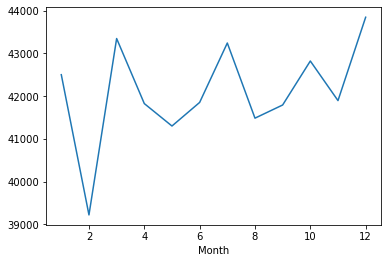

In [243]:
#Plot of quantity sold by month
month_sum = transactions_customers.groupby(["Month"]).sum()["PROD_QTY"]

month_sum.plot()

In [162]:
#want to perform a regression on brand, weights, month, and price
sales_regression_data = transactions_customers.groupby(["Brand", "Weight", "Price", "Month"]).sum()["PROD_QTY"]

In [168]:
sales_regression_data = sales_regression_data.reset_index()

In [181]:
sales_regression_data["Month"] = sales_regression_data["Month"].astype('category')

In [182]:
#Need to get dummy variables
sales_regression_data = pd.get_dummies(sales_regression_data, drop_first = True) #Drop first to remove perfect collinearity

In [184]:
X = sales_regression_data.drop("PROD_QTY", axis = 1)
y = sales_regression_data["PROD_QTY"]

In [185]:
from statsmodels.api import OLS
OLS(y,X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               PROD_QTY   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     28.60
Date:                Fri, 23 Jul 2021   Prob (F-statistic):           1.75e-93
Time:                        01:39:18   Log-Likelihood:                -4029.8
No. Observations:                 527   AIC:                             8128.
Df Residuals:                     493   BIC:                             8273.
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Weight                        -6.2164      0.582    -10.683      0.000      -7.360      -5.073
Price                        414.0327     34.909     11.860      0.000     345.444     482.621
Brand_Burger Rings           717.8105    190.055      3.777      0.000     344.393    1091.228
Brand_CCs                    987.9784    185.965      5.313      0.000     622.596    1353.360
Brand_Cheetos                122.8780    152.947      0.803      0.422    -177.631     423.387
Brand_Cheezels               216.1220    171.180      1.263      0.207    -120.210     552.454
Brand_Cobs                   710.2237    198.763      3.573      0.000     319.696    1100.751
Brand_Doritos                710.3807    163.189      4.353      0.000     389.748    1031.013
Brand_French Fries           118.1823    189.643      0.623      0.533    -254.427     490.791
Brand_Grain Waves            509.7084    158.851      3.209      0.001     197.600     821.817
Brand_Infuzions              449.1071    154.856      2.900      0.004     144.847     753.367
Brand_Kettle                1025.9991    161.975      6.334      0.000     707.753    1344.245
Brand_Natural Chip Company  1073.4323    189.643      5.660      0.000     700.823    1446.041
Brand_Old El Paso           1120.5570    206.575      5.424      0.000     714.681    1526.433
Brand_Pringles              2944.1206    184.498     15.957      0.000    2581.620    3306.621
Brand_Red Rock Deli         1207.0711    150.125      8.040      0.000     912.107    1502.036
Brand_Smiths                 889.9311    152.465      5.837      0.000     590.370    1189.493
Brand_Sunbites               382.1145    176.387      2.166      0.031      35.552     728.677
Brand_Thins                 1614.7651    176.168      9.166      0.000    1268.632    1960.898
Brand_Tostitos               829.4532    205.031      4.045      0.000     426.610    1232.296
Brand_Twisties               540.3866    179.473      3.011      0.003     187.760     893.013
Brand_Tyrrells               351.3732    196.857      1.785      0.075     -35.409     738.155
Brand_Woolworths            1062.0914    136.510      7.780      0.000     793.878    1330.305
Month_2                      -80.0244    115.686     -0.692      0.489    -307.322     147.273
Month_3                       20.6341    115.686      0.178      0.859    -206.663     247.932
Month_4                      -16.4878    115.686     -0.143      0.887    -243.785     210.810
Month_5                     -336.2882    107.388     -3.132      0.002    -547.282    -125.294
Month_6                      -15.8293    115.686     -0.137      0.891    -243.127     211.468
Month_7                       18.0732    115.686      0.156      0.876    -209.224     245.371
Month_8                     -224.5226    10

In [200]:
#Average transaction value
transactions_sum = transactions_customers.groupby(["TXN_ID"]).sum()['TOT_SALES']

In [202]:
products_sum = transactions_customers.groupby(["Chip Variety"]).sum()['TOT_SALES']

In [209]:
#Total sales by chip variety
products_sum.sort_values()

Chip Variety
Woolworths Medium Salsa               4050.0
Woolworths Mild Salsa                 4234.5
Woolworths Crinkle Cut Original       4532.2
Sunbites Wholegrain French Onion      4600.2
Woolworths Crinkle Cut Chicken        4702.2
                                      ...   
Kettle Mozzarella Basil & Pesto      34457.4
Cheezels Cheese                      40029.9
Smiths Crinkle Cut Salt & Vinegar    42790.8
Doritos Supreme                      73742.6
Smiths Crinkle Cut Original          78671.3
Name: TOT_SALES, Length: 109, dtype: float64

In [204]:
products_mean = transactions_customers.groupby(["Chip Variety"]).mean()['TOT_SALES']

In [206]:
#Mean sales by chip variety
products_mean.sort_values()

Chip Variety
Woolworths Medium Salsa                2.832168
Woolworths Mild Salsa                  2.840040
Woolworths Crinkle Cut Chicken         3.205317
Sunbites Wholegrain French Onion       3.212430
Woolworths Crinkle Cut Original        3.214326
                                        ...    
Kettle Sweet Chilli And Sour Cream    10.322437
Kettle Honey Soy Chicken              10.348856
Kettle Original                       10.364103
Kettle Mozzarella Basil & Pesto       10.428995
Doritos Supreme                       11.823409
Name: TOT_SALES, Length: 109, dtype: float64

<AxesSubplot:xlabel='LIFESTAGE', ylabel='PREMIUM_CUSTOMER'>

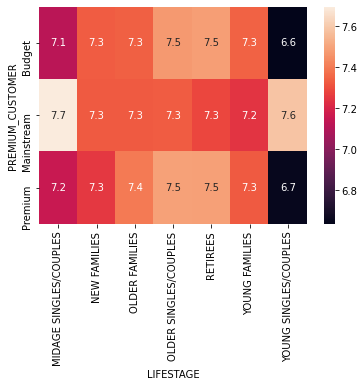

In [244]:
#Heatmap of total sales per transaction by lifestage and customer profile
profile_lifestage_sales = transactions_customers.groupby(["PREMIUM_CUSTOMER", "LIFESTAGE", 'TXN_ID']).sum()["TOT_SALES"].reset_index().drop("TXN_ID", axis = 1)

sns.heatmap(profile_lifestage_sales.groupby(["PREMIUM_CUSTOMER", "LIFESTAGE"]).mean().unstack()["TOT_SALES"], annot = True)

<AxesSubplot:xlabel='LIFESTAGE', ylabel='PREMIUM_CUSTOMER'>

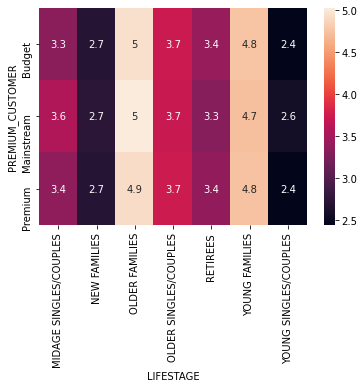

In [245]:
profile_lifestage_transactions = transactions_customers.groupby(["PREMIUM_CUSTOMER", "LIFESTAGE", 'LYLTY_CARD_NBR']).count()["TXN_ID"].reset_index().drop("LYLTY_CARD_NBR", axis = 1)

#Heatmap of transaction count by lifestage and customer profile
sns.heatmap(profile_lifestage_transactions.groupby(["PREMIUM_CUSTOMER", "LIFESTAGE"]).mean().unstack()["TXN_ID"], annot = True)